We start by writing the function which uses the inversion method to generate Laplace distributed r.v's

In [ ]:
import numpy as np

def Laplace(N):
  U = np.random.uniform(size = N)
  return np.where(U < 0.5, np.log(2*U), -np.log(2*(1-U)))


We now verify that our Laplace function works:

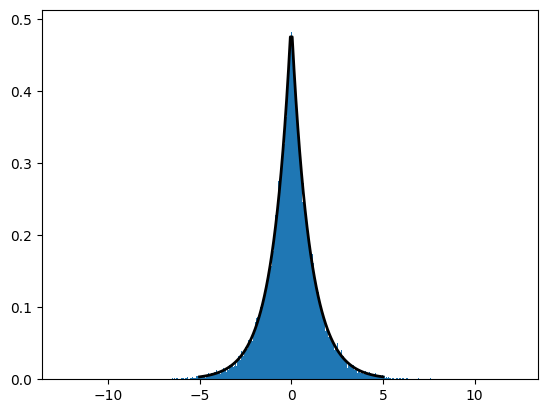

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)

L = Laplace(int(1e5))

plt.hist(L, bins = 1000, density = True)
plt.plot(x, stats.laplace.pdf(x) , 'k', linewidth = 2)

plt.show()

In [ ]:
def Optimized_ARGL(N):
  C = (2 * np.exp(0.5))/(np.sqrt(2*np.pi))
  U = np.random.uniform(size = N)
  L = Laplace(N)
  accept = (C * 0.5 * np.exp(-np.abs(L)))*U < (1/np.sqrt(np.pi * 2)) * np.exp(-0.5 * (L**2) )
  while not np.all(accept):
    failed_indices = np.where(~accept)[0]

    L[failed_indices] = Laplace(len(failed_indices))
    U[failed_indices] = np.random.uniform(size=len(failed_indices))

    accept[failed_indices] = (C * 0.5 * np.exp(-np.abs(L[failed_indices])))*U[failed_indices] < (1/np.sqrt(np.pi * 2)) * np.exp(-0.5 * (L[failed_indices]**2) )

  return L




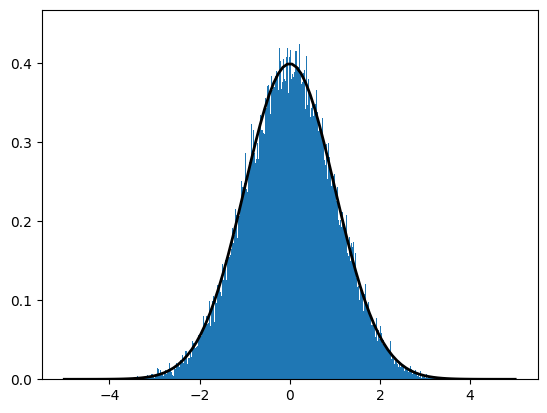

In [ ]:
Z = np.linspace(-5, 5, 100)

G = Optimized_ARGL(int(1e5))

plt.hist(G, bins = 1000, density = True)
plt.plot(Z, stats.norm.pdf(Z, 0, 1) , 'k', linewidth = 2)

plt.show()